# Requirements

In [64]:
! pip install gdown==v4.6.3

In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [66]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the focus is on time series forecasting, specifically targeting the prediction of the current **mean temperature** in the city of Delhi. Your task involves employing bagging and boosting methods to forecast the **mean temperature**. To accomplish this use data from the preceding three days, consisting of **mean temperature**, **humidity**, **wind speed**, and **mean pressure**.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

In [67]:
!gdown 1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC # Download the dataset.

Downloading...
From: https://drive.google.com/uc?id=1kczX2FpFTH1QEsDeg6dszXM3Azwyd7XC
To: /content/climate-data.csv
100% 78.1k/78.1k [00:00<00:00, 61.2MB/s]


## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [68]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv('/content/climate-data.csv')
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


Explore the dataset using visualizations of your choice.

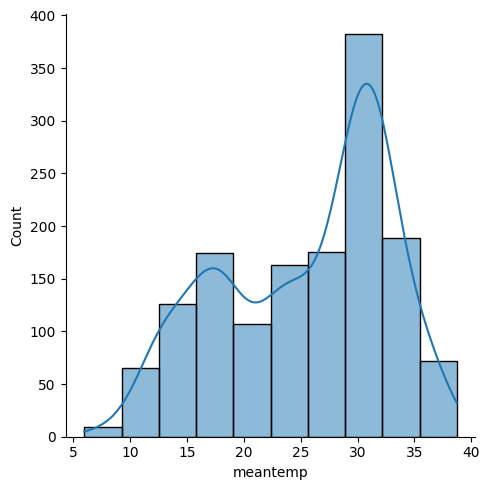

In [69]:
# Write your code here. Add as many boxes as you need.
sns.displot(df['meantemp'], kde=True, bins=10)
plt.show()

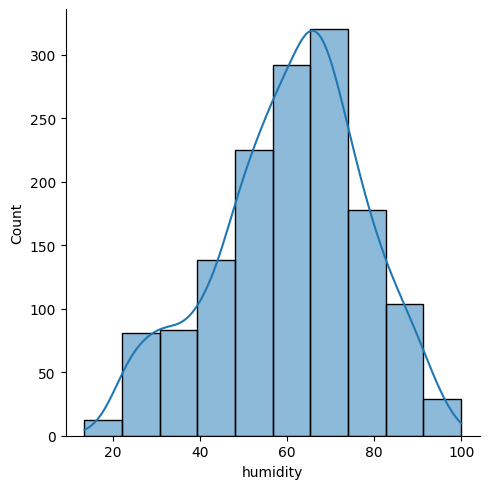

In [70]:
sns.displot(df['humidity'], kde=True, bins=10)
plt.show()

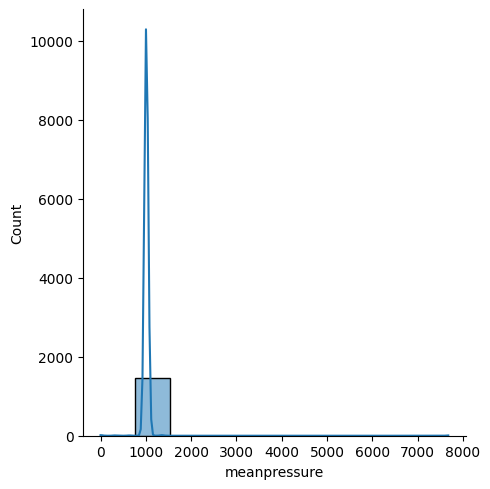

In [71]:
sns.displot(df['meanpressure'], kde=True, bins=10)
plt.show()

<ipython-input-72-787789797ce7>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)  # data.corr() returns the correlation between each pair of variables


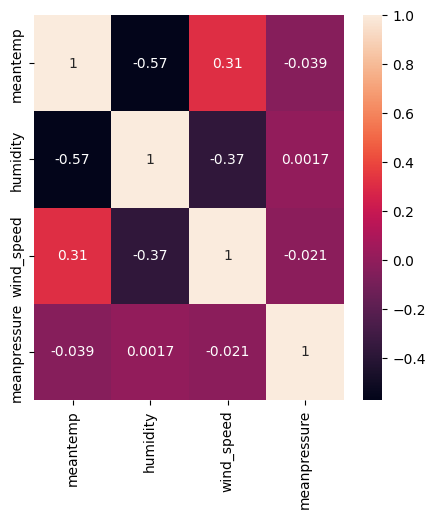

In [72]:
df_show = df
df_show = df_show.drop(columns='date')


plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True)  # data.corr() returns the correlation between each pair of variables
plt.show()

# Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [73]:
# Write your code here. Add as many boxes as you need.
df.isnull().sum()

date            0
meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

In [74]:
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [75]:
df = df.set_index('date')
df = df.sort_index()
lag = 3

for i in range(1, lag + 1):
  df[f'meantemp_prev{i}'] = df['meantemp'].shift(i)
  df[f'humidity_prev{i}'] = df['humidity'].shift(i)
  df[f'wind_speed_prev{i}'] = df['wind_speed'].shift(i)
  df[f'meanpressure_prev{i}'] = df['meanpressure'].shift(i)

df

,meantemp,humidity,wind_speed,meanpressure,meantemp_prev1,humidity_prev1,wind_speed_prev1,meanpressure_prev1,meantemp_prev2,humidity_prev2,wind_speed_prev2,meanpressure_prev2,meantemp_prev3,humidity_prev3,wind_speed_prev3,meanpressure_prev3
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN
2013-01-04,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,14.095238,89.666667,6.266667,1017.904762,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


In [76]:
df.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_prev1        1
humidity_prev1        1
wind_speed_prev1      1
meanpressure_prev1    1
meantemp_prev2        2
humidity_prev2        2
wind_speed_prev2      2
meanpressure_prev2    2
meantemp_prev3        3
humidity_prev3        3
wind_speed_prev3      3
meanpressure_prev3    3
dtype: int64

In [77]:
df = df.dropna(axis = 0)
df.isnull().sum()

meantemp              0
humidity              0
wind_speed            0
meanpressure          0
meantemp_prev1        0
humidity_prev1        0
wind_speed_prev1      0
meanpressure_prev1    0
meantemp_prev2        0
humidity_prev2        0
wind_speed_prev2      0
meanpressure_prev2    0
meantemp_prev3        0
humidity_prev3        0
wind_speed_prev3      0
meanpressure_prev3    0
dtype: int64

In [78]:
features = []

for i in range(1, lag + 1):
  features.append(f'meantemp_prev{i}')
  features.append(f'humidity_prev{i}')
  features.append(f'wind_speed_prev{i}')
  features.append(f'meanpressure_prev{i}')

features

['meantemp_prev1',
 'humidity_prev1',
 'wind_speed_prev1',
 'meanpressure_prev1',
 'meantemp_prev2',
 'humidity_prev2',
 'wind_speed_prev2',
 'meanpressure_prev2',
 'meantemp_prev3',
 'humidity_prev3',
 'wind_speed_prev3',
 'meanpressure_prev3']

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [79]:
# Write your code here. Add as many boxes as you need.
X, Y = df[features], df['meantemp']
X

,meantemp_prev1,humidity_prev1,wind_speed_prev1,meanpressure_prev1,meantemp_prev2,humidity_prev2,wind_speed_prev2,meanpressure_prev2,meantemp_prev3,humidity_prev3,wind_speed_prev3,meanpressure_prev3
date,,,,,,,,,,,,
2013-01-04,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000,10.000000,84.500000,0.000000,1015.666667
2013-01-05,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667,7.400000,92.000000,2.980000,1017.800000
2013-01-06,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667,7.166667,87.000000,4.633333,1018.666667
2013-01-07,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000,8.666667,71.333333,1.233333,1017.166667
2013-01-08,7.000000,78.600000,6.300000,1020.000000,7.000000,82.800000,1.480000,1018.000000,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381,14.000000,94.300000,9.085000,1014.350000
2016-12-29,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000,17.142857,74.857143,8.784211,1016.952381
2016-12-30,15.238095,87.857143,6.000000,1016.904762,17.217391,68.043478,3.547826,1015.565217,16.850000,67.550000,8.335000,1017.200000


In [80]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

## Ensemble Learning Methods

### Bagging

Create an instance of a Random Forest model and train it using the `fit` function.

In [81]:
# Write your code here. Add as many boxes as you need.
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)
rf.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, n_estimators=1500)

Use the trained model to make predictions for the test set.

In [82]:
# Write your code here. Add as many boxes as you need.
y_pred = rf.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [83]:
# Write your code here. Add as many boxes as you need.
r2_score(Y_test, y_pred)

0.9063480051904386

### Boosting

Create an instance of an XGBoost model and train it using the `fit` function.

In [84]:
# Write your code here. Add as many boxes as you need.
from xgboost import XGBRegressor

xgb = XGBRegressor(objective ='reg:linear',
    colsample_bytree = 0.3, learning_rate = 0.1,
    max_depth = 5, alpha = 2, n_estimators = 10)

xgb.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:30:15] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


XGBRegressor(alpha=2, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, ...)

Use the trained model to make predictions for the test set.

In [85]:
# Write your code here. Add as many boxes as you need.
xgb_pred = xgb.predict(X_test)

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [86]:
# Write your code here. Add as many boxes as you need.
r2_score(Y_test, xgb_pred)

0.5711061374208096

In [87]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
Y_train = scaler.fit_transform(Y_train.values.reshape(-1, 1))

In [88]:
X_train.shape

(1167, 12)

In [108]:
# moze da se smeni 1 na features count
# X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))

In [109]:
X_train.shape

(1167, 1, 12)

In [110]:
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [111]:
X_test.shape

(292, 1, 12)

In [112]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
import keras

model = Sequential()
model.add(LSTM(100,  activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(LSTM(50,  activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(loss=keras.losses.MeanSquaredError() , optimizer=keras.optimizers.Adam(), metrics=[keras.metrics.MeanSquaredError(), keras.metrics.MeanAbsoluteError() ])

In [113]:
history = model.fit(X_train, Y_train, batch_size=16, validation_split=0.2, epochs=30, shuffle=False)

Epoch 1/30
59/59 [==============================] - 5s 19ms/step - loss: 0.2214 - mean_squared_error: 0.2214 - mean_absolute_error: 0.4076 - val_loss: 0.0414 - val_mean_squared_error: 0.0414 - val_mean_absolute_error: 0.1755
Epoch 2/30
59/59 [==============================] - 0s 6ms/step - loss: 0.0486 - mean_squared_error: 0.0486 - mean_absolute_error: 0.1857 - val_loss: 0.0129 - val_mean_squared_error: 0.0129 - val_mean_absolute_error: 0.0914
Epoch 3/30
59/59 [==============================] - 0s 6ms/step - loss: 0.0128 - mean_squared_error: 0.0128 - mean_absolute_error: 0.0916 - val_loss: 0.0043 - val_mean_squared_error: 0.0043 - val_mean_absolute_error: 0.0537
Epoch 4/30
59/59 [==============================] - 0s 5ms/step - loss: 0.0058 - mean_squared_error: 0.0058 - mean_absolute_error: 0.0603 - val_loss: 0.0033 - val_mean_squared_error: 0.0033 - val_mean_absolute_error: 0.0467
Epoch 5/30
59/59 [==============================] - 0s 5ms/step - loss: 0.0048 - mean_squared_error: 0.

In [114]:
lstm_preds = model.predict(X_test)

10/10 [==============================] - 0s 3ms/step


In [115]:
lstm_preds = scaler.inverse_transform(lstm_preds)

In [116]:
r2_score(lstm_preds, Y_test)

-0.006076003926434259

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the max_depth (`max_depth`) for the Random Forest model using a cross-validation with grid search and time series split. This involves systematically experimenting with various values for `max_depth` and evaluating the model's performance using cross-validation. Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

Hints:
- For grid search use the `GridCVSearch` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html.
- For cross-validation use the `TimeSeriesSplit` from the `scikit-learn` library. Check the documentation at https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.TimeSeriesSplit.html.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**

In [ ]:
# Write your code here. Add as many boxes as you need.
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, shuffle=False)

## Fine-tuning the Random Forest Hyperparameter
Experiment with various values for `max_depth` and evaluate the model's performance using cross-validation.

In [ ]:
# Write your code here. Add as many boxes as you need.
# from sklearn.model_selection import GridSearchCV

# rf_model = RandomForestRegressor(criterion='squared_error')
# # rf = RandomForestRegressor(n_estimators=1500, criterion='squared_error', max_depth=10)
# param_grid = {
#     'n_estimators': [1000, 1250, 1500, 1750, 2000],
#     'max_depth': [1, 3, 5, 7, 10]
# }

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='r2', cv=5)
# grid_search.fit(X_train, Y_train)

## Final Assessment of the Model Performance
Upon determining the most suitable `max_depth` value, evaluate the model's performance on a test set for final assessment.

In [ ]:
# Write your code here. Add as many boxes as you need.